<a href="https://colab.research.google.com/github/WomenPlusPlus/deploy-impact-21-kona-a/blob/TCarrPGH-tiff_adds_data/deploy-impact-21-kona-a/kona-app/data/data_transformation/00_initial_data_cleansing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the initial notebook that filters the data. The original data was very messy. Our team created the Main Catagory, Sub Catagory, And user catagories ourselves by analyzing the data that was presented to us. That being said, we are not perfect so there is a lot of misspelled words, synonyms and other errors in the data. This notebook fixes data quality issues by filtering and transforming the groups so organizations can be filtered in various ways within the app.  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Load the Data

In [ ]:
df = pd.read_csv("/content/orgs.csv", index_col="ID")
df.head()

,Name,TargetGroup,Main Category,Sub Cat,SDG,Objective,Phone,Email,WebAddress,Address,Region,Unnamed: 12,Unnamed: 13
ID,,,,,,,,,,,,,
1,La Liane,"Children, Youth, Women","Social Services,Health,Education ,Employment","Food, Shelter,Disabled ,Socialisation, Integra...","No Poverty, No Hunger, Health, Education, Gend...",Better living conditions for women and children,"78 434 51 51 , 77 783 31 40",c.hallegot@laposte.net,https://laliane.eu,Ndiolofféne Nord,Saint-Louis,NaN,NaN
2,Association Jeunesse Espoir (AJS),"Children,Youth","Health,Education ,Employment,Migration","Entrepreneurship, Job Placement, Vocational Tr...","No Poverty, Health, Education, Work / Economic...",The main goal of AJS is to support children an...,"34 961 49 80 , 77 843 39 34",jeunesseespoir60@gmail.com,www.jeunesse-espoir-senegal.com,Hlm villa 407 derrière la Maison de Lille Sain...,Saint-Louis,NaN,NaN
3,Connexion Sans Frontieres,"Women,Children,Professionals",Social Services,Protection,"No Poverty, Industry / Innovation / Infrastruc...","Integration of ICT in development policies, su...",776342646,aakcisse@gmail.com,NaN,AVENUE CHEIKH ANTA DIOP,Dakar,NaN,NaN
4,African Network for Horticultural Development,"Men, Women, Children, Youth, Professionals","Agriculture,Social Services,Employment,Legal,E...","Seed Distribution, Conservation, Agricultural...",Sustainable Communities,Combining the experiences and resources availa...,NaN,radhort@fao.org,www.fao.org/radhort,NaN,Dakar,NaN,NaN
5,African Network for Integrated Development (ANID),Women,"Legal,Employment,Social Services,Education","Human Rights, Local Policy,Partnerships,Victim...","No Poverty, Inequalities, Sustainable Communit...","Democratic development that benefits everyone,...",36 860 76 98,radi@orange.sn,www.radi-afrique.com,"Yoff virage, Lot 100",Dakar,NaN,NaN


## Remove duplicates from main category



In [ ]:
df['MainCategory'] = df['Main Category'].str.split(',').map(lambda x : ','.join(sorted(set(x),key=x.index)))

## Check for differences in the Main Category

In [ ]:
df.iloc[17]


Name                                            Plan International
TargetGroup                                        Children, Youth
Main Category                            Education,Legal,Education
Sub Cat          Improving Education. Sucess for Girls,Protecti...
SDG              No Poverty, No Hunger, Health, Education, Gend...
Objective        Promoting children’s rights and equality for g...
Phone                                                 34 823 08 27
Email                            senegal.co@plan-international.org
WebAddress                  https://plan-international.org/senegal
Address          Cité Keur Gorgui, lot n AD17\nDakar Fann\nBP 1...
Region                                                       Dakar
Unnamed: 12                                                    NaN
Unnamed: 13                                                    NaN
MainCategory                                       Education,Legal
Name: 18, dtype: object

## Rename the Sub Category column. Split list into strings

In [ ]:
df['SubCategory'] = df['Sub Cat'].astype(str).str.split(',').map(lambda x : ','.join(sorted(set(x),key=x.index)))
df.head()

,Name,TargetGroup,Main Category,Sub Cat,SDG,Objective,Phone,Email,WebAddress,Address,Region,Unnamed: 12,Unnamed: 13,MainCategory,SubCategory
ID,,,,,,,,,,,,,,,
1,La Liane,"Children, Youth, Women","Social Services,Health,Education ,Employment","Food, Shelter,Disabled ,Socialisation, Integra...","No Poverty, No Hunger, Health, Education, Gend...",Better living conditions for women and children,"78 434 51 51 , 77 783 31 40",c.hallegot@laposte.net,https://laliane.eu,Ndiolofféne Nord,Saint-Louis,NaN,NaN,"Social Services,Health,Education ,Employment","Food, Shelter,Disabled ,Socialisation, Integra..."
2,Association Jeunesse Espoir (AJS),"Children,Youth","Health,Education ,Employment,Migration","Entrepreneurship, Job Placement, Vocational Tr...","No Poverty, Health, Education, Work / Economic...",The main goal of AJS is to support children an...,"34 961 49 80 , 77 843 39 34",jeunesseespoir60@gmail.com,www.jeunesse-espoir-senegal.com,Hlm villa 407 derrière la Maison de Lille Sain...,Saint-Louis,NaN,NaN,"Health,Education ,Employment,Migration","Entrepreneurship, Job Placement, Vocational Tr..."
3,Connexion Sans Frontieres,"Women,Children,Professionals",Social Services,Protection,"No Poverty, Industry / Innovation / Infrastruc...","Integration of ICT in development policies, su...",776342646,aakcisse@gmail.com,NaN,AVENUE CHEIKH ANTA DIOP,Dakar,NaN,NaN,Social Services,Protection
4,African Network for Horticultural Development,"Men, Women, Children, Youth, Professionals","Agriculture,Social Services,Employment,Legal,E...","Seed Distribution, Conservation, Agricultural...",Sustainable Communities,Combining the experiences and resources availa...,NaN,radhort@fao.org,www.fao.org/radhort,NaN,Dakar,NaN,NaN,"Agriculture,Social Services,Employment,Legal","Seed Distribution, Conservation, Agricultural..."
5,African Network for Integrated Development (ANID),Women,"Legal,Employment,Social Services,Education","Human Rights, Local Policy,Partnerships,Victim...","No Poverty, Inequalities, Sustainable Communit...","Democratic development that benefits everyone,...",36 860 76 98,radi@orange.sn,www.radi-afrique.com,"Yoff virage, Lot 100",Dakar,NaN,NaN,"Legal,Employment,Social Services,Education","Human Rights, Local Policy,Partnerships,Victim..."


## Drop additional columns that we don't care about

In [ ]:
df = df.drop(columns=['Unnamed: 12',	'Unnamed: 13'	])
df.head()

,Name,TargetGroup,Main Category,Sub Cat,SDG,Objective,Phone,Email,WebAddress,Address,Region,MainCategory,SubCategory
ID,,,,,,,,,,,,,
1,La Liane,"Children, Youth, Women","Social Services,Health,Education ,Employment","Food, Shelter,Disabled ,Socialisation, Integra...","No Poverty, No Hunger, Health, Education, Gend...",Better living conditions for women and children,"78 434 51 51 , 77 783 31 40",c.hallegot@laposte.net,https://laliane.eu,Ndiolofféne Nord,Saint-Louis,"Social Services,Health,Education ,Employment","Food, Shelter,Disabled ,Socialisation, Integra..."
2,Association Jeunesse Espoir (AJS),"Children,Youth","Health,Education ,Employment,Migration","Entrepreneurship, Job Placement, Vocational Tr...","No Poverty, Health, Education, Work / Economic...",The main goal of AJS is to support children an...,"34 961 49 80 , 77 843 39 34",jeunesseespoir60@gmail.com,www.jeunesse-espoir-senegal.com,Hlm villa 407 derrière la Maison de Lille Sain...,Saint-Louis,"Health,Education ,Employment,Migration","Entrepreneurship, Job Placement, Vocational Tr..."
3,Connexion Sans Frontieres,"Women,Children,Professionals",Social Services,Protection,"No Poverty, Industry / Innovation / Infrastruc...","Integration of ICT in development policies, su...",776342646,aakcisse@gmail.com,NaN,AVENUE CHEIKH ANTA DIOP,Dakar,Social Services,Protection
4,African Network for Horticultural Development,"Men, Women, Children, Youth, Professionals","Agriculture,Social Services,Employment,Legal,E...","Seed Distribution, Conservation, Agricultural...",Sustainable Communities,Combining the experiences and resources availa...,NaN,radhort@fao.org,www.fao.org/radhort,NaN,Dakar,"Agriculture,Social Services,Employment,Legal","Seed Distribution, Conservation, Agricultural..."
5,African Network for Integrated Development (ANID),Women,"Legal,Employment,Social Services,Education","Human Rights, Local Policy,Partnerships,Victim...","No Poverty, Inequalities, Sustainable Communit...","Democratic development that benefits everyone,...",36 860 76 98,radi@orange.sn,www.radi-afrique.com,"Yoff virage, Lot 100",Dakar,"Legal,Employment,Social Services,Education","Human Rights, Local Policy,Partnerships,Victim..."


## Rearrange the order of columns


In [ ]:
df2 = df[['Name',	'TargetGroup', 'MainCategory',	'SubCategory','SDG','Objective','Phone','Email','WebAddress','Address',	'Region']]
df2.head()

,Name,TargetGroup,MainCategory,SubCategory,SDG,Objective,Phone,Email,WebAddress,Address,Region
ID,,,,,,,,,,,
1,La Liane,"Children, Youth, Women","Social Services,Health,Education ,Employment","Food, Shelter,Disabled ,Socialisation, Integra...","No Poverty, No Hunger, Health, Education, Gend...",Better living conditions for women and children,"78 434 51 51 , 77 783 31 40",c.hallegot@laposte.net,https://laliane.eu,Ndiolofféne Nord,Saint-Louis
2,Association Jeunesse Espoir (AJS),"Children,Youth","Health,Education ,Employment,Migration","Entrepreneurship, Job Placement, Vocational Tr...","No Poverty, Health, Education, Work / Economic...",The main goal of AJS is to support children an...,"34 961 49 80 , 77 843 39 34",jeunesseespoir60@gmail.com,www.jeunesse-espoir-senegal.com,Hlm villa 407 derrière la Maison de Lille Sain...,Saint-Louis
3,Connexion Sans Frontieres,"Women,Children,Professionals",Social Services,Protection,"No Poverty, Industry / Innovation / Infrastruc...","Integration of ICT in development policies, su...",776342646,aakcisse@gmail.com,NaN,AVENUE CHEIKH ANTA DIOP,Dakar
4,African Network for Horticultural Development,"Men, Women, Children, Youth, Professionals","Agriculture,Social Services,Employment,Legal","Seed Distribution, Conservation, Agricultural...",Sustainable Communities,Combining the experiences and resources availa...,NaN,radhort@fao.org,www.fao.org/radhort,NaN,Dakar
5,African Network for Integrated Development (ANID),Women,"Legal,Employment,Social Services,Education","Human Rights, Local Policy,Partnerships,Victim...","No Poverty, Inequalities, Sustainable Communit...","Democratic development that benefits everyone,...",36 860 76 98,radi@orange.sn,www.radi-afrique.com,"Yoff virage, Lot 100",Dakar


## Remove extra commas


In [ ]:
df2.SubCategory = df.SubCategory.apply(lambda x: ',' if ',,' in x else x)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


## Write to CSV


In [ ]:
df2.to_csv(r'testorgs.csv')

# Analysis



In [ ]:
# Count the numer of times a category appears
df_cnt = df2['MainCategory']
df_cnt_split = df_cnt.str.split(",")
freq = {} 
for row in df_cnt_split:
  for word in row:
      word_trimmed = word.strip() 
      if (word_trimmed in freq): 
          freq[word_trimmed] += 1
      else: 
          freq[word_trimmed] = 1
print(freq)


{'Social Services': 35, 'Health': 27, 'Education': 30, 'Employment': 14, 'Migration': 12, 'Agriculture': 9, 'Legal': 25, 'Partnerships': 7, 'Crisis': 6, 'Technology': 2, 'Natural Resource Management': 6}


In [ ]:
# Count the numer of times a target group appears
df_users = df2['TargetGroup']
df_users_split = df_users.str.split(",")
user_freq = {} 
for row in df_users_split:
  for word in row:
      word_trimmed = word.strip() 
      if (word_trimmed in user_freq): 
          user_freq[word_trimmed] += 1
      else: 
          user_freq[word_trimmed] = 1
print(user_freq)

{'Children': 49, 'Youth': 40, 'Women': 38, 'Professionals': 38, 'Men': 26}


In [ ]:
# Count the numer of times a sub category appears
df_subcat = df2['SubCategory']
df_subcat_split = df_subcat.str.split(",")
subcat_freq = {} 
for row in df_subcat_split:
  for word in row:
      word_trimmed = word.strip() 
      if (word_trimmed in subcat_freq): 
          subcat_freq[word_trimmed] += 1
      else: 
          subcat_freq[word_trimmed] = 1
print(subcat_freq)

{'Food': 10, 'Shelter': 6, 'Disabled': 1, 'Socialisation': 1, 'Integration': 1, 'Cultural Activies': 1, 'Sporting activities': 1, 'Training': 5, 'Entrepreneurship': 2, 'Job Placement': 1, 'Vocational Training': 1, 'Education': 2, 'Health': 2, 'Integration.': 1, 'Protection': 5, 'Seed Distribution': 1, 'Conservation': 1, 'Agricultural Development': 1, 'Entrepreneurs': 5, 'Human Rights': 3, 'Local Policy': 2, 'Partnerships': 7, 'Victim Advocacy': 2, 'Financial Support': 4, 'Leadership Training': 5, '': 25, 'Financial Services': 4, 'Facilities': 1, 'Student Research': 1, 'Child Protection': 3, 'HIV/AIDS': 4, 'Domestic Violence': 1, 'Poverty': 2, 'Technology': 2, 'nan': 2, 'Exchange Oppertunities': 1, 'Agriculture developpement': 1, 'Social Services': 2, 'Legal': 1, 'Crisis': 1, 'Natural Disasters': 1, 'Armed Conflict': 1, 'Maternal': 3, 'Malnutrition': 1, 'Cultural Rights': 1, 'Economic Rights': 1, 'International Justice': 1, "Women's Rights": 2, "Children's Rights": 7, 'Saftey and Wellbe

In [ ]:
cat_df = pd.DataFrame.from_dict(freq, orient='index', columns=['Frequency'])
cat_df= cat_df.sort_values('Frequency')
#cat_df.columns = ['Category', 'Frequency']



In [ ]:
cat_df

,Frequency
Technology,2
Crisis,6
Natural Resource Management,6
Partnerships,7
Agriculture,9
Migration,12
Employment,14
Legal,25
Health,27
Education,30


In [ ]:
df2

,Name,TargetGroup,MainCategory,SubCategory,SDG,Objective,Phone,Email,WebAddress,Address,Region
ID,,,,,,,,,,,
1,La Liane,"Children, Youth, Women","Social Services,Health,Education ,Employment","Food, Shelter,Disabled ,Socialisation, Integra...","No Poverty, No Hunger, Health, Education, Gend...",Better living conditions for women and children,"78 434 51 51 , 77 783 31 40",c.hallegot@laposte.net,https://laliane.eu,Ndiolofféne Nord,Saint-Louis
2,Association Jeunesse Espoir (AJS),"Children,Youth","Health,Education ,Employment,Migration","Entrepreneurship, Job Placement, Vocational Tr...","No Poverty, Health, Education, Work / Economic...",The main goal of AJS is to support children an...,"34 961 49 80 , 77 843 39 34",jeunesseespoir60@gmail.com,www.jeunesse-espoir-senegal.com,Hlm villa 407 derrière la Maison de Lille Sain...,Saint-Louis
3,Connexion Sans Frontieres,"Women,Children,Professionals",Social Services,Protection,"No Poverty, Industry / Innovation / Infrastruc...","Integration of ICT in development policies, su...",776342646,aakcisse@gmail.com,NaN,AVENUE CHEIKH ANTA DIOP,Dakar
4,African Network for Horticultural Development,"Men, Women, Children, Youth, Professionals","Agriculture,Social Services,Employment,Legal","Seed Distribution, Conservation, Agricultural...",Sustainable Communities,Combining the experiences and resources availa...,NaN,radhort@fao.org,www.fao.org/radhort,NaN,Dakar
5,African Network for Integrated Development (ANID),Women,"Legal,Employment,Social Services,Education","Human Rights, Local Policy,Partnerships,Victim...","No Poverty, Inequalities, Sustainable Communit...","Democratic development that benefits everyone,...",36 860 76 98,radi@orange.sn,www.radi-afrique.com,"Yoff virage, Lot 100",Dakar
...,...,...,...,...,...,...,...,...,...,...,...
58,ACTED,"Men, Women, Children, Youth, Professionals","Education,Employment,Social Services ,Legal,Na...",",","Climate, No Hunger, No Poverty, Responsible Co...","Ending poverty, reinforcing NGO and Associations",NaN,NaN,www.acted.org,NaN,Dakar
59,USAID,"Men, Women, Children, Youth, Professionals","Agriculture,Social Services,Education ,Legal ,...",",","Education, Work / Economic Growth, Health, No ...","Imrpoving development by creating jobs, improv...",33 879 4000,usaid-senegal@usaid.gov,www.usaid.gov/senegal,Route des Almadies,Dakar
60,UNOPS,Professionals,"Partnerships,Legal,Health,Natural Resource Man...","Government, Financial Services,Food, Water, Hy...","Health, Water/Sanitation, Life on land, Indust...",Help and support to goverments and communities...,338693838,info.snoh@unops.org,www.unops.org/fr/senegal,NaN,Dakar


Text(0.5, 1.0, 'Frequency of Categories in Kona Organizations')

<Figure size 720x1080 with 0 Axes>

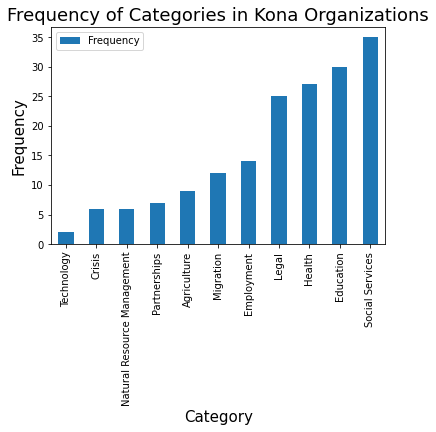

In [ ]:
plt.figure(figsize=(10,15))
cat_df.plot.bar()
#plt.axhline(0, color="k");
plt.xlabel("Category", size=15)
plt.ylabel("Frequency", size=15)
plt.title("Frequency of Categories in Kona Organizations", size=18)

In [ ]:
user_df2 = pd.DataFrame.from_dict(user_freq, orient='index', columns=['Frequency'])
user_df2= user_df2.sort_values('Frequency')

Text(0.5, 1.0, 'Frequency of User Specific Organizations')

<Figure size 720x1080 with 0 Axes>

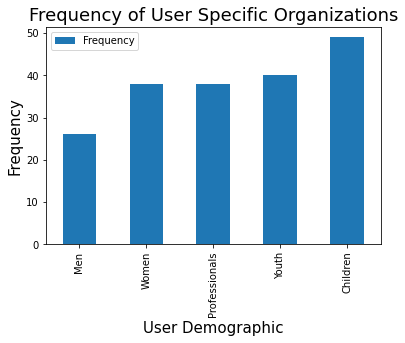

In [ ]:
plt.figure(figsize=(10,15))
user_df2.plot.bar()
#plt.axhline(0, color="k");
plt.xlabel("User Demographic", size=15)
plt.ylabel("Frequency", size=15)
plt.title("Frequency of User Specific Organizations", size=18)

In [ ]:
subcat_df = pd.DataFrame.from_dict(subcat_freq, orient='index', columns=['Frequency'])
subcat_df= subcat_df.sort_values('Frequency', ascending=False)
pd.set_option('display.max_rows', None)

subcat_df

,Frequency
,25
Food,10
Children's Rights,7
Partnerships,7
Shelter,6
Leadership Training,5
Entrepreneurs,5
Protection,5
Water,5
Training,5


In [ ]:
data = df2.to_json(r'\orgs.json')
data

In [ ]:
df2[df2['SubCategory'].str.contains("War")]

,Name,TargetGroup,MainCategory,SubCategory,SDG,Objective,Phone,Email,WebAddress,Address,Region
ID,,,,,,,,,,,
62,Médecins sans Frontière,Professionals,"Health, Crisis","Epidemic Management,Natural Disaster, War, Hum...",Health,Providing assistance to populations in distres...,NaN,NaN,https://www.msf.org/,NaN,NaN


In [ ]:
df2[df2['Objective'].str.contains('Training')]

ValueError: ignored

In [ ]:
mask = df2.apply(lambda col: col.str.contains('sex').any(),
                axis=0)
sub_df = df2.loc[: , mask]
print(sub_df)

In [ ]:
subs_df = pd.read_csv("sub_categories_orgs.csv")
subs_df

,ID,Name,TargetGroup,Sub Target Group,MainCategory,SubCategory,SDG,Objective,Phone,Email,WebAddress,Address,Region
0,1,La Liane,"Children, Youth, Women","Vulnerable Professionals,Pregnant Women","Social Services, Health, Education, Employment","Food, Shelter,Disabled ,Socialisation, Integra...","No Poverty, No Hunger, Health, Education, Gend...",Better living conditions for women and children,"78 434 51 51 , 77 783 31 40",c.hallegot@laposte.net,https://laliane.eu,Ndiolofféne Nord,Saint-Louis
1,2,Association Jeunesse Espoir (AJS),"Children,Youth",Vulnerable,"Health,Education ,Employment,Migration","Entrepreneurship, Job Placement, Vocational Tr...","No Poverty, Health, Education, Work / Economic...",The main goal of AJS is to support children an...,"34 961 49 80 , 77 843 39 34",jeunesseespoir60@gmail.com,www.jeunesse-espoir-senegal.com,Hlm villa 407 derrière la Maison de Lille Sain...,Saint-Louis
2,3,Connexion Sans Frontieres,"Women,Children,Professionals",Vulnerable,Social Services,Protection,"No Poverty, Industry / Innovation / Infrastruc...","Integration of ICT in development policies, su...",776342646,aakcisse@gmail.com,NaN,AVENUE CHEIKH ANTA DIOP,Dakar
3,4,African Network for Horticultural Development,"Men, Women, Children, Youth, Professionals",Vulnerable,"Agriculture,Social Services,Employment,Legal","Seed Distribution, Conservation, Agricultural...",Sustainable Communities,Combining the experiences and resources availa...,NaN,radhort@fao.org,www.fao.org/radhort,NaN,Dakar
4,5,African Network for Integrated Development (ANID),Women,NaN,"Legal,Employment,Social Services,Education","Human Rights, Local Policy,Partnerships,Victim...","No Poverty, Inequalities, Sustainable Communit...","Democratic development that benefits everyone,...",36 860 76 98,radi@orange.sn,www.radi-afrique.com,"Yoff virage, Lot 100",Dakar
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,ACTED,"Men, Women, Children, Youth, Professionals",NaN,"Education,Employment,Social Services ,Legal,Na...",",","Climate, No Hunger, No Poverty, Responsible Co...","Ending poverty, reinforcing NGO and Associations",NaN,NaN,www.acted.org,NaN,Dakar
58,59,USAID,"Men, Women, Children, Youth, Professionals",NaN,"Agriculture,Social Services,Education ,Legal ,...",",","Education, Work / Economic Growth, Health, No ...","Imrpoving development by creating jobs, improv...",33 879 4000,usaid-senegal@usaid.gov,www.usaid.gov/senegal,Route des Almadies,Dakar
59,60,UNOPS,Professionals,NaN,"Partnerships,Legal,Health,Natural Resource Man...","Government, Financial Services,Food, Water, Hy...","Health, Water/Sanitation, Life on land, Indust...",Help and support to goverments and communities...,338693838,info.snoh@unops.org,www.unops.org/fr/senegal,NaN,Dakar
60,61,PNUD / UNDP,Professionals,NaN,Partnerships,"Financial Support, Technology","Gender Equality, No Poverty, Justice / Institu...",Help goverment and communities reach the 17SDGs,338596767,NaN,sn.undp.org,Route King Fahd,Dakar


KeyError: ignored